C:\Users\Tamim\AppData\Local\Temp\ipykernel_8628\1015124986.py:168: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_unique_books, x='author_gender', palette={'male': 'royalblue', 'female': 'tomato'})
C:\Users\Tamim\AppData\Local\Temp\ipykernel_8628\1015124986.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_unique_books, x='author_gender', y='author_rating_count', estimator=np.median, palette={'male': 'royalblue', 'female': 'tomato'})


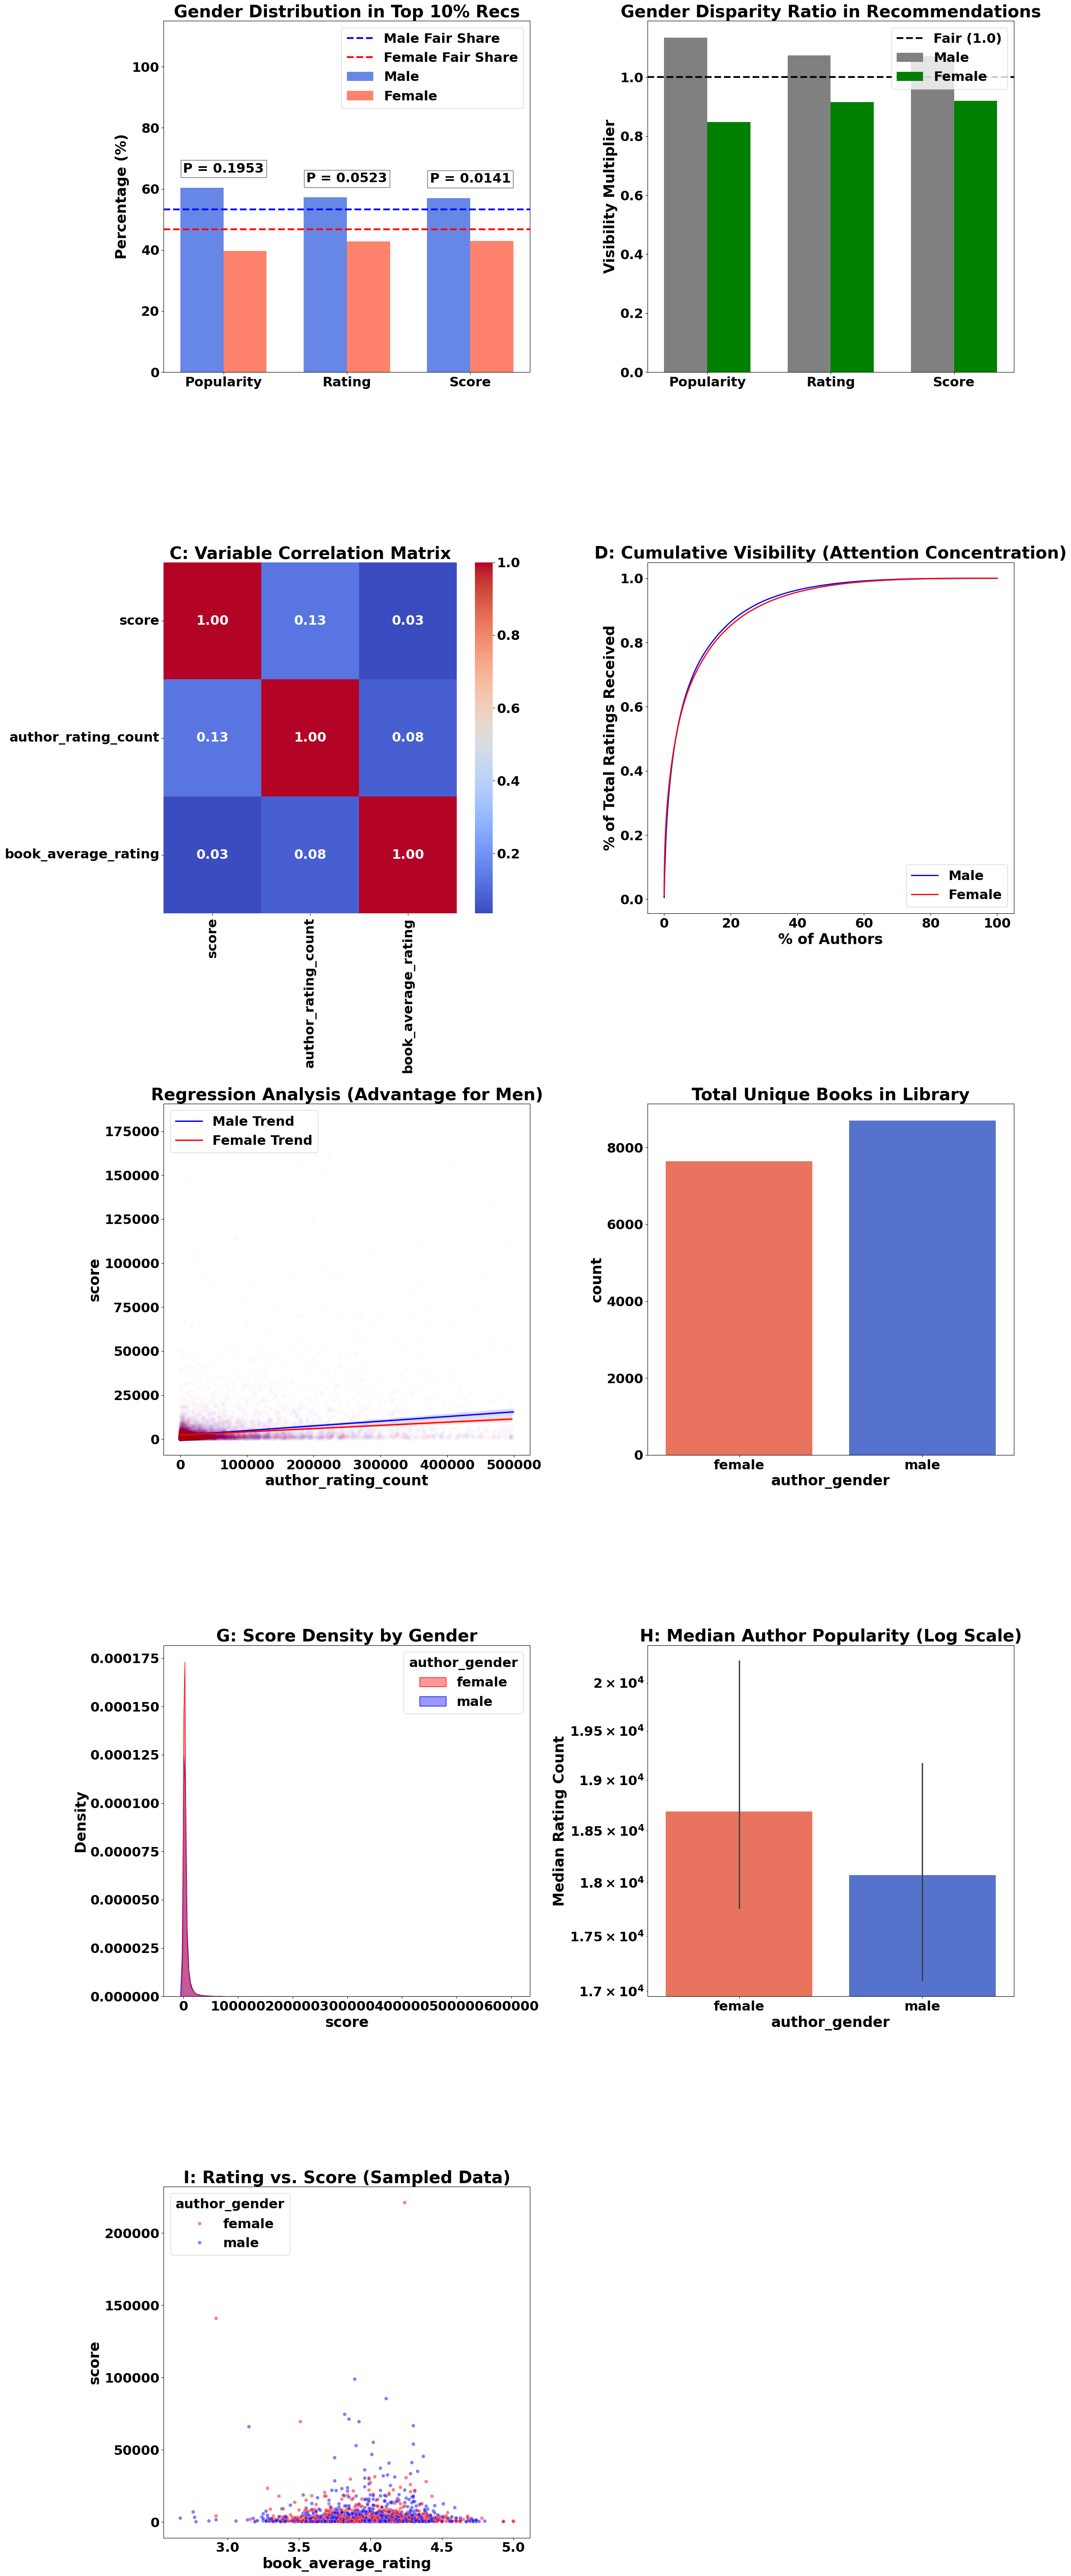


======= FINAL RESEARCH SUMMARY =======
Total Unique Titles: 16350
Library Gender Ratio: Male 53.2%
1. Popularity-Based: P=0.1953, Male Ratio=60.4%
2. Rating-Based:     P=0.0523, Male Ratio=57.2%
3. Score-Based:      P=0.0141, Male Ratio=57.0%


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np  


filepath = r'D:\Ahad\AT\TU Graz\2nd Semester\FCSS\Final Project\RQ1\good_reads_final.csv'
df = pd.read_csv(filepath) 


df = df.dropna(subset=['author_gender', 'score', 'author_rating_count', 'book_average_rating', 'book_title'])
df = df[df['author_gender'].isin(['male', 'female'])] 

df_unique_books = df.drop_duplicates(subset=['book_title'])

TOP_PERCENT = 0.10
N = int(df_unique_books['book_title'].nunique() * TOP_PERCENT)

def get_stats(data):
    counts = data['author_gender'].value_counts(normalize=True) * 100
    male_pct = counts.get('male', 0)
    female_pct = counts.get('female', 0)
    model = smf.ols('score ~ author_gender + author_rating_count', data=data).fit()
    p_val = model.pvalues.get('author_gender[T.male]', 1.0)
    boost = model.params.get('author_gender[T.male]', 0)
    return male_pct, female_pct, p_val, boost

df_pop = df.sort_values("author_rating_count", ascending=False).head(N)
df_rate = df.sort_values("book_average_rating", ascending=False).head(N)
df_score = df.sort_values("score", ascending=False).head(N)

s_pop = get_stats(df_pop)
s_rate = get_stats(df_rate)
s_score = get_stats(df_score)

import matplotlib as mpl
plt.rcParams.update({
    'font.size': 22,
    'font.weight': 'bold',
    'axes.titlesize': 28,
    'axes.titleweight': 'bold',
    'axes.labelsize': 24,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 22
})

'''mpl.rcParams.update({
    'font.size': 17,           # base font size
    'axes.titlesize': 20,      # subplot titles
    'axes.labelsize': 18,      # x/y labels
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'figure.titlesize': 22,
    'font.weight': 'bold'
})'''


plt.figure(figsize=(24, 60))
plt.subplot(5, 2, 1)

library_male_ratio = df_unique_books['author_gender'].value_counts(normalize=True)['male']
library_female_ratio = df_unique_books['author_gender'].value_counts(normalize=True)['female']
fair_male = library_male_ratio * 100
fair_female = library_female_ratio * 100

plt.axhline(fair_male, color='blue', linestyle='--', linewidth=3, label='Male Fair Share')
plt.axhline(fair_female, color='red', linestyle='--', linewidth=3, label='Female Fair Share')


algos = ['Popularity', 'Rating', 'Score']
males = [s_pop[0], s_rate[0], s_score[0]]
females = [s_pop[1], s_rate[1], s_score[1]]
p_vals = [s_pop[2], s_rate[2], s_score[2]]
x = np.arange(len(algos))
width = 0.35
plt.bar(x - width/2, males, width, label='Male', color='royalblue', alpha=0.8)
plt.bar(x + width/2, females, width, label='Female', color='tomato', alpha=0.8)
for i in range(len(algos)):
    plt.text(i, max(males[i], females[i]) + 5, f'P = {p_vals[i]:.4f}', ha='center', fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))
plt.title('Gender Distribution in Top 10% Recs')
plt.xticks(x, algos)
plt.ylabel('Percentage (%)')
plt.ylim(0, 115)
plt.legend()


plt.subplot(5, 2, 2)
'''library_male_ratio = df_unique_books['author_gender'].value_counts(normalize=True)['male']
disparity = [m / (library_male_ratio * 100) for m in males]
sns.barplot(x=algos, y=disparity, palette='viridis')
plt.axhline(1, color='black', linestyle='--', label='Neutral (Fair)')
plt.title('B: Bias Disparity Ratio (>1 = Male Over-representation)')
plt.ylabel('Visibility Multiplier')
plt.legend()'''
library_female_ratio = 1 - library_male_ratio
male_disparity = [m / (library_male_ratio * 100) for m in males]
female_disparity = [f / (library_female_ratio * 100) for f in females]
plt.subplot(5, 2, 2)

x = np.arange(len(algos))
width = 0.35

plt.bar(
    x - width/2,
    male_disparity,
    width,
    label='Male',
    color='grey'
)

plt.bar(
    x + width/2,
    female_disparity,
    width,
    label='Female',
    color='green'
)

plt.axhline(
    1,
    color='black',
    linestyle='--',
    linewidth=3,
    label='Fair (1.0)'
)

plt.xticks(x, algos)
plt.ylabel('Visibility Multiplier')
plt.title('Gender Disparity Ratio in Recommendations')
plt.legend()




plt.subplot(5, 2, 3)
numeric_df = df_unique_books[['score', 'author_rating_count', 'book_average_rating']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('C: Variable Correlation Matrix')


plt.subplot(5, 2, 4)
for gender, col in zip(['male', 'female'], ['blue', 'red']):
    subset = df[df['author_gender'] == gender].sort_values('author_rating_count', ascending=False)
    y = np.cumsum(subset['author_rating_count']) / subset['author_rating_count'].sum()
    x_range = np.linspace(0, 100, len(y))
    plt.plot(x_range, y, label=f'{gender.title()}', color=col, linewidth=2)
plt.title('D: Cumulative Visibility (Attention Concentration)')
plt.xlabel('% of Authors')
plt.ylabel('% of Total Ratings Received')
plt.legend()


plt.subplot(5, 2, 5)
df_plot = df_unique_books[df_unique_books['author_rating_count'] < 500000].copy()
sns.regplot(data=df_plot[df_plot['author_gender']=='male'], x='author_rating_count', y='score', 
            scatter_kws={'alpha':0.01, 'color':'blue'}, line_kws={'color':'blue', 'label':'Male Trend'})
sns.regplot(data=df_plot[df_plot['author_gender']=='female'], x='author_rating_count', y='score', 
            scatter_kws={'alpha':0.01, 'color':'red'}, line_kws={'color':'red', 'label':'Female Trend'})
plt.title('Regression Analysis (Advantage for Men)')
plt.legend()


plt.subplot(5, 2, 6)
sns.countplot(data=df_unique_books, x='author_gender', palette={'male': 'royalblue', 'female': 'tomato'})
plt.title('Total Unique Books in Library')


plt.subplot(5, 2, 7)
sns.kdeplot(data=df, x='score', hue='author_gender', fill=True, common_norm=False, alpha=0.4, palette={'male': 'blue', 'female': 'red'})
plt.title('G: Score Density by Gender')


plt.subplot(5, 2, 8)
sns.barplot(data=df_unique_books, x='author_gender', y='author_rating_count', estimator=np.median, palette={'male': 'royalblue', 'female': 'tomato'})
plt.yscale('log')
plt.title('H: Median Author Popularity (Log Scale)')
plt.ylabel('Median Rating Count')


plt.subplot(5, 2, 9)
sns.scatterplot(data=df_unique_books.sample(min(2000, len(df_unique_books))), x='book_average_rating', y='score', hue='author_gender', alpha=0.5, palette={'male': 'blue', 'female': 'red'})
plt.title('I: Rating vs. Score (Sampled Data)')

plt.tight_layout()
plt.show()


print("\n======= FINAL RESEARCH SUMMARY =======")
print(f"Total Unique Titles: {len(df_unique_books)}")
print(f"Library Gender Ratio: Male {library_male_ratio*100:.1f}%")
print(f"1. Popularity-Based: P={s_pop[2]:.4f}, Male Ratio={s_pop[0]:.1f}%")
print(f"2. Rating-Based:     P={s_rate[2]:.4f}, Male Ratio={s_rate[0]:.1f}%")
print(f"3. Score-Based:      P={s_score[2]:.4f}, Male Ratio={s_score[0]:.1f}%")
print("=====================================")

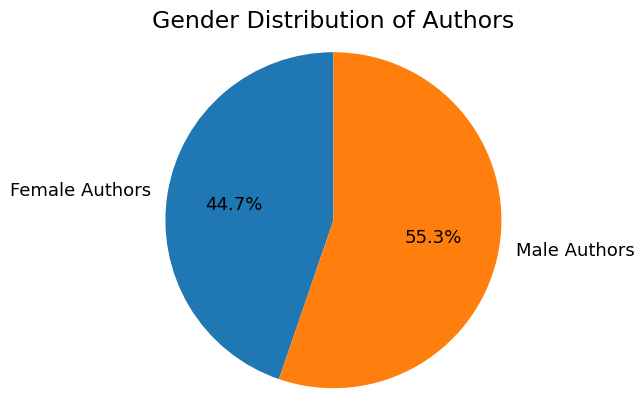

In [7]:

import matplotlib as mpl
plt.rcParams.update({
    'font.size': 13,
    'font.weight': 'normal',
    'axes.titlesize': 17,
    'axes.titleweight': 'normal',
    'axes.labelsize': 13,
    'axes.labelweight': 'normal',
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 13
})

gender_counts = df.groupby("author_gender")["author_id"].nunique()

labels = gender_counts.index.str.capitalize() + " Authors"
sizes = gender_counts.values

plt.figure()
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Gender Distribution of Authors")
plt.axis('equal') 
plt.show()


Numeric Info regarding data: 
Goodread data collected from Kaggle
Earliest publication date : 1678-01-01
Latest publication date   : 2019-01-01
Total timespan            : 341 years 
Each row represents a book–author instance
Total observations: 22,891
Total Attributes: 20
Unique book titles: 16,350
Number of used attributes: 6
Used attributes:
 - book_id
 - book_title
 - author_gender
 - author_rating_count
 - book_average_rating
 - score
The score is a visibility proxy, combining popularity and engagement.


In [23]:
print("===== DATASET OVERVIEW =====\n")

print(f"Total observations (rows): {df.shape[0]}")

print(f"Total attributes (columns): {df.shape[1]}")

used_columns = [
    "book_id",
    "book_title",
    "author_gender",
    "author_rating_count",
    "book_average_rating",
    "score",
]

df_used = df[used_columns]
print(f"Number of used attributes: {df_used.shape[1]}")

print("Used attributes:")
for col in df_used.columns:
    print(f" - {col}")

df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

df_dates = df.dropna(subset=['publish_date'])

start_date = df_dates['publish_date'].min()
end_date = df_dates['publish_date'].max()

timespan_years = end_date.year - start_date.year

print("===== PUBLICATION DATE TIMESPAN =====")
print(f"Earliest publication date : {start_date.date()}")
print(f"Latest publication date   : {end_date.date()}")
print(f"Total timespan            : {timespan_years} years")
print("====================================")

===== DATASET OVERVIEW =====

Total observations (rows): 22891
Total attributes (columns): 20
Number of used attributes: 6
Used attributes:
 - book_id
 - book_title
 - author_gender
 - author_rating_count
 - book_average_rating
 - score
===== PUBLICATION DATE TIMESPAN =====
Earliest publication date : 1678-01-01
Latest publication date   : 2019-01-01
Total timespan            : 341 years
